In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/venezia/venezia.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_1985.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_1996.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_1993.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_1992.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_1986.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_2009.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_1988.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_2013.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_2005.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_2001.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_1990.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_1984.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_2012.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_1983.csv
/kaggle/input/venezia/Punta_

In [40]:
data= pd.read_csv('/kaggle/input/venezia/venezia.csv',parse_dates=['datetime'])
data

,datetime,level
0,1983-01-01 01:00:00,44.0
1,1983-01-01 02:00:00,35.0
2,1983-01-01 03:00:00,23.0
3,1983-01-01 04:00:00,10.0
4,1983-01-01 05:00:00,1.0
...,...,...
289267,2015-12-31 20:00:00,-18.0
289268,2015-12-31 21:00:00,-14.0
289269,2015-12-31 22:00:00,-5.0
289270,2015-12-31 23:00:00,8.0


In [41]:
data["Date"] = data["datetime"].dt.date
data["Hour"] = data["datetime"].dt.hour
data.drop(["datetime"],axis=1,inplace=True, errors="ignore")
data = data.dropna()
data

,level,Date,Hour
0,44.0,1983-01-01,1
1,35.0,1983-01-01,2
2,23.0,1983-01-01,3
3,10.0,1983-01-01,4
4,1.0,1983-01-01,5
...,...,...,...
289267,-18.0,2015-12-31,20
289268,-14.0,2015-12-31,21
289269,-5.0,2015-12-31,22
289270,8.0,2015-12-31,23


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289272 entries, 0 to 289271
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   level   289272 non-null  float64
 1   Date    289272 non-null  object 
 2   Hour    289272 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 6.6+ MB


In [43]:
data.describe()

,level,Hour
count,289272.000000,289272.000000
mean,25.883449,11.500000
std,29.130133,6.922199
min,-92.000000,0.000000
25%,6.000000,5.750000
50%,27.000000,11.500000
75%,47.000000,17.250000
max,159.000000,23.000000


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

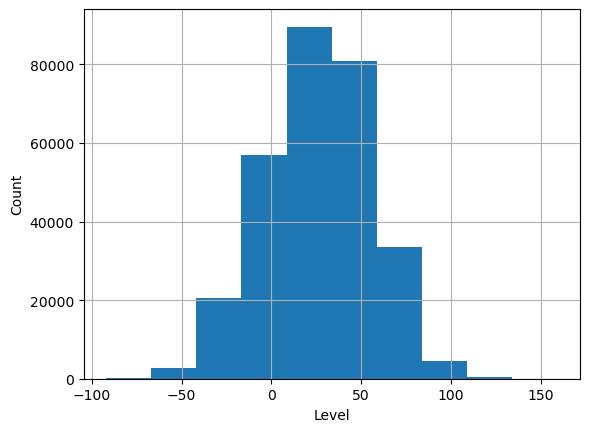

In [45]:
data['level'].hist()
plt.ylabel('Count')
plt.xlabel('Level')
plt.show()

In [46]:
grouped_hour= data.groupby('Hour')['level'].mean()
grouped_hour

Hour
0     36.987140
1     30.999087
2     23.510246
3     16.344810
4     11.430100
5     10.226583
6     13.007550
7     19.029619
8     26.530739
9     33.549739
10    38.306646
11    39.645565
12    37.380237
13    32.088526
14    25.208496
15    18.623828
16    14.080478
17    13.038206
18    15.851863
19    21.693769
20    28.854725
21    35.344313
22    39.429769
23    40.040737
Name: level, dtype: float64

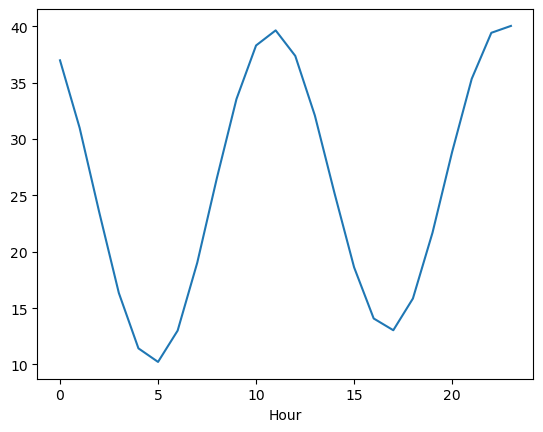

In [47]:
grouped_hour.plot()
plt.show()

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare data
X = np.array(grouped_hour.index).reshape(-1, 1)
y = grouped_hour.values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)

Linear Regression MSE: 198.65784346667402


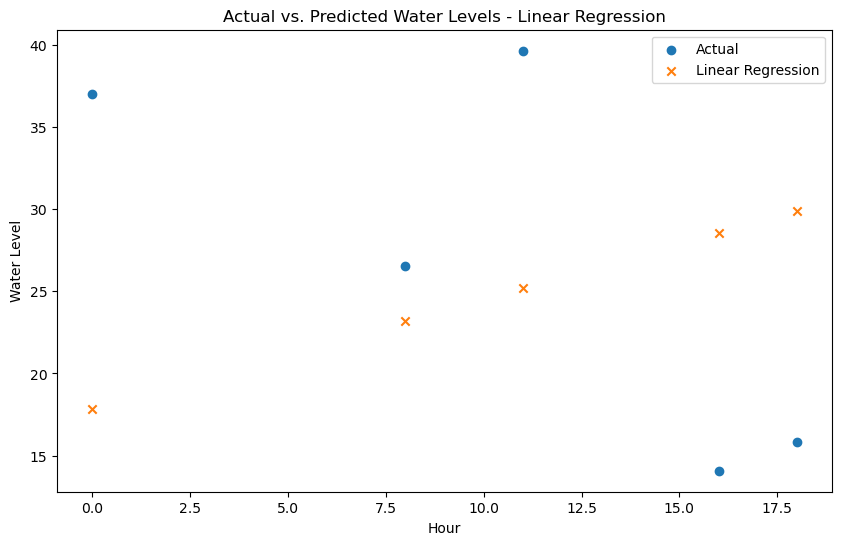

In [49]:
# Visualize Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, y_pred_lr, label='Linear Regression', marker='x')
plt.xlabel('Hour')
plt.ylabel('Water Level')
plt.title('Actual vs. Predicted Water Levels - Linear Regression')
plt.legend()
plt.show()

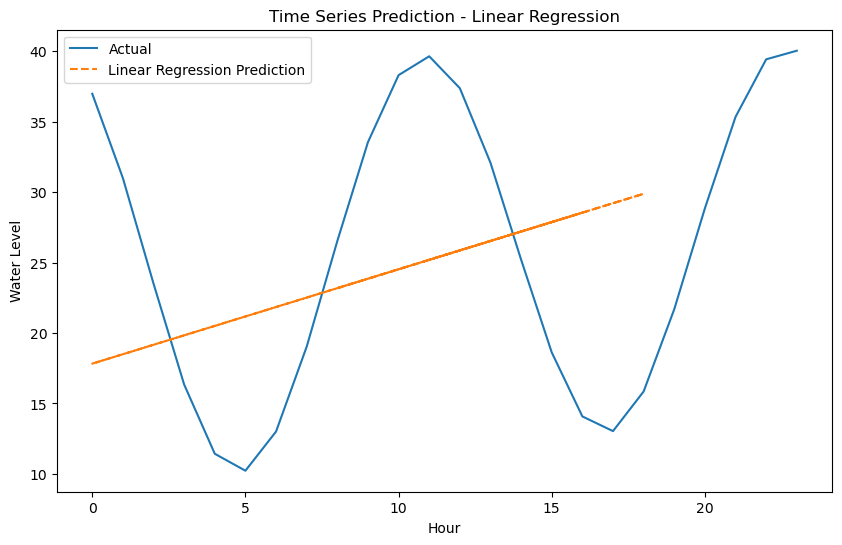

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_hour.index, grouped_hour.values, label='Actual')
plt.plot(X_test, y_pred_lr, label='Linear Regression Prediction', linestyle='dashed')
plt.xlabel('Hour')
plt.ylabel('Water Level')
plt.title('Time Series Prediction - Linear Regression')
plt.legend()
plt.show()

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Create and train Decision Tree model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# Create and train Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

# Evaluate the models
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Decision Tree MSE:", mse_dt)
print("Random Forest MSE:", mse_rf)

Decision Tree MSE: 24.49499545513083
Random Forest MSE: 26.561708272182223


In [52]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train Gradient Boosting model
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = model_gb.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting MSE:", mse_gb)

Gradient Boosting MSE: 24.510964939966595


In [53]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Prepare data (reshape for LSTM input)
X = np.array(grouped_hour.values).reshape(-1, 1, 1)
y = grouped_hour.values

# Split data (you can modify the split strategy as needed)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Create and train LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=100, batch_size=1)

# Make predictions
y_pred_lstm = model_lstm.predict(X_test)

# Evaluate the model
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print("LSTM MSE:", mse_lstm)

Epoch 1/100
19/19 [==============================] - 1s 2ms/step - loss: 658.3294
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 593.5079
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 521.1782
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 429.1906
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 317.9998
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 196.7658
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 106.1177
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 45.0270
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 14.4272
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 4.9640
Epoch 11/100
19/19 [==============================] - 0s 2ms/step - loss: 3.0885
Epoch 12/100
19/19 [==============================] - 0s 2ms/step - loss: 2.8907
Epoch 13/100
19/19 [=

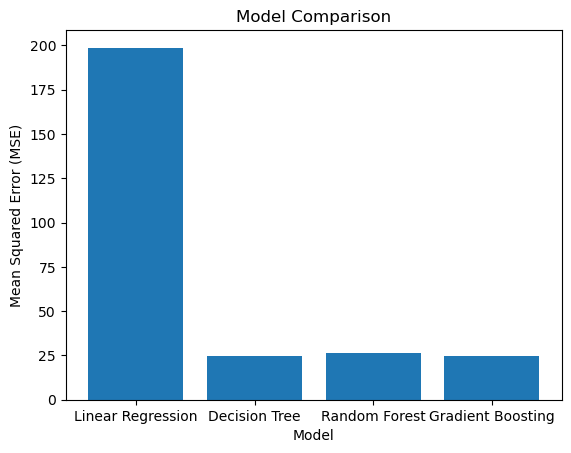

In [54]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
mse_values = [mse_lr, mse_dt, mse_rf, mse_gb]

plt.bar(model_names, mse_values)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Comparison')
plt.show()

In [56]:
from keras.layers import GRU, Dense

# Similar to the LSTM example above
# ... (data preparation and splitting)

# Create and train GRU model
model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(1, 1)))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')
model_gru.fit(X_train, y_train, epochs=100, batch_size=1)

# Make predictions
y_pred_gru = model_gru.predict(X_test)

# Evaluate the model
mse_gru = mean_squared_error(y_test, y_pred_gru)
print("GRU MSE:", mse_gru)

Epoch 1/100
19/19 [==============================] - 1s 3ms/step - loss: 547.1014
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 473.5616
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 399.0333
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 314.0770
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 226.0461
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 127.0389
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 55.4842
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 16.5264
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 3.1518
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6820
Epoch 11/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4741
Epoch 12/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4603
Epoch 13/100
19/19 [===

In [57]:
from keras.layers import LSTM, Dense

# Similar to the LSTM example above
# ... (data preparation and splitting)

# Create and train LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=100, batch_size=1)

# Make predictions
y_pred_lstm = model_lstm.predict(X_test)

# Evaluate the model
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print("LSTM MSE:", mse_lstm)

Epoch 1/100
19/19 [==============================] - 1s 3ms/step - loss: 602.5156
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 524.4819
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 433.9334
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 334.8711
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 218.9610
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 118.5082
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 53.1336
Epoch 8/100
19/19 [==============================] - 0s 3ms/step - loss: 19.7758
Epoch 9/100
19/19 [==============================] - 0s 3ms/step - loss: 6.3476
Epoch 10/100
19/19 [==============================] - 0s 3ms/step - loss: 3.3943
Epoch 11/100
19/19 [==============================] - 0s 2ms/step - loss: 2.8142
Epoch 12/100
19/19 [==============================] - 0s 2ms/step - loss: 2.6932
Epoch 13/100
19/19 [===

In [58]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Create and train Simple RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(1, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.fit(X_train, y_train, epochs=100, batch_size=1)

# Make predictions
y_pred_rnn = model_rnn.predict(X_test)

# Evaluate the model
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
print("Simple RNN MSE:", mse_rnn)

Epoch 1/100
19/19 [==============================] - 1s 2ms/step - loss: 890.5792
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 727.8058
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 590.8167
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 474.9685
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 373.2351
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 283.9506
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 216.6462
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 153.2719
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 104.1645
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 65.5197
Epoch 11/100
19/19 [==============================] - 0s 2ms/step - loss: 41.3596
Epoch 12/100
19/19 [==============================] - 0s 2ms/step - loss: 23.4667
Epoch 13/100
19/

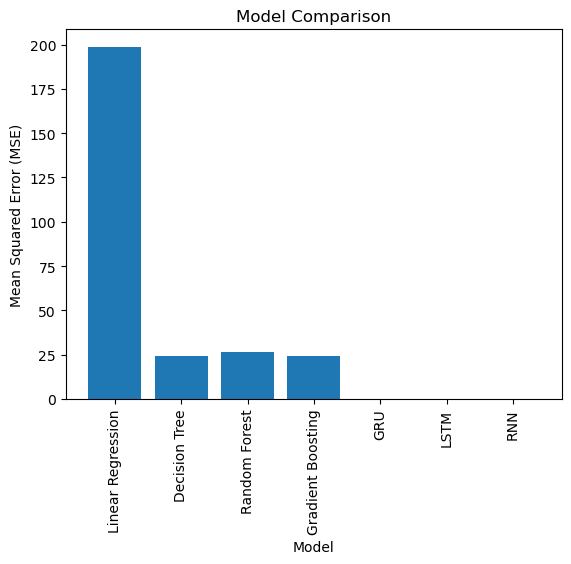

In [59]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'GRU', 'LSTM', 'RNN']
mse_values = [mse_lr, mse_dt, mse_rf, mse_gb, mse_gru, mse_lstm, mse_rnn]

plt.bar(model_names, mse_values)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Comparison')
plt.xticks(rotation= 90)
plt.show()